In [14]:
import pandas as pd
import seaborn as sns
data = pd.read_csv("train.csv")
print(data.shape)
data.head()
print(data.info())


(10886, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


(2) datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
to_datetime 활용 : 링크 참조
pandas datetime extract year month day 키워드로 검색해 보기

In [15]:
data['year']=pd.to_datetime(data['datetime']).dt.year
data['month']=pd.to_datetime(data['datetime']).dt.month
data['day']=pd.to_datetime(data['datetime']).dt.day
data['hour']=pd.to_datetime(data['datetime']).dt.hour
data['minute']=pd.to_datetime(data['datetime']).dt.minute
data['second']=pd.to_datetime(data['datetime']).dt.second
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
 12  year        10886 non-null  int64  
 13  month       10886 non-null  int64  
 14  day         10886 non-null  int64  
 15  hour        10886 non-null  int64  
 16  minute      10886 non-null  int64  
 17  second      10886 non-null  int64  
dtypes: float64(3), int64(14), object(1)
memory usage: 1.5+ MB



(3) year, month, day, hour, minute, second 데이터 개수 시각화하기
sns.countplot 활용해서 시각화하기
subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기

## graph for statistics of every yearly monthly dayly and hourly 

### modify month from number to month name

[Text(0.5, 0, 'Hour'), Text(0, 0.5, 'Count')]

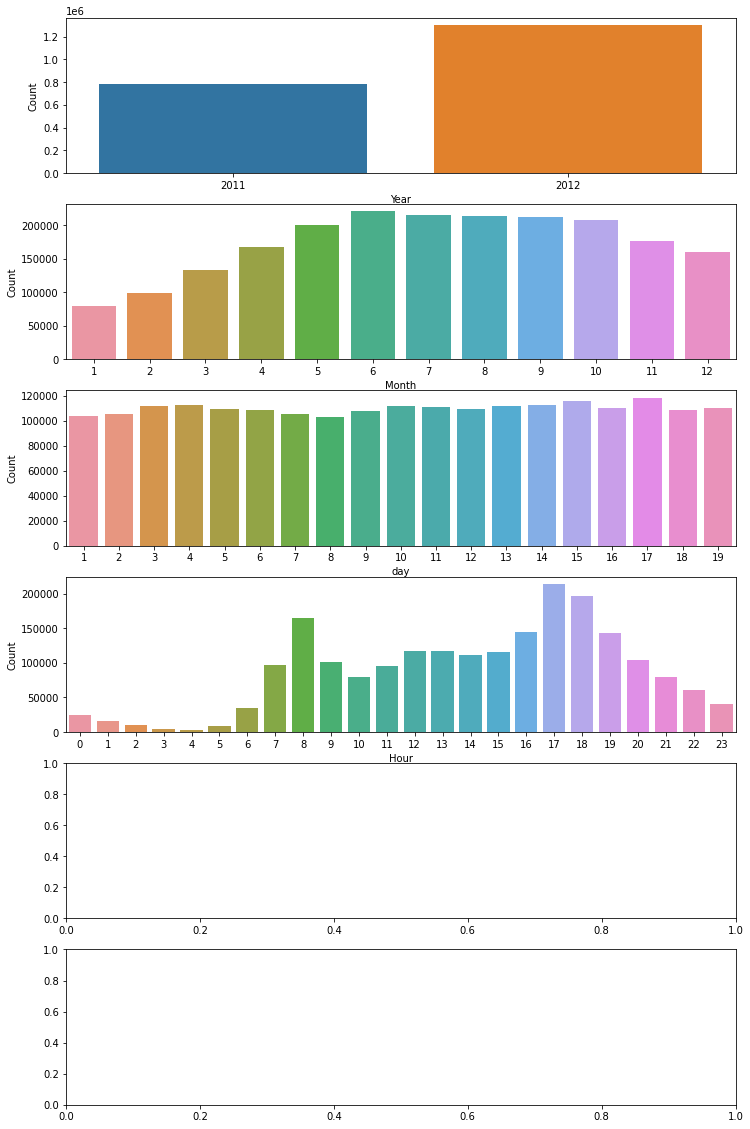

In [16]:

import matplotlib.pyplot as plt
fig,(ax1,ax2,ax3,ax4,ax5,ax6)= plt.subplots(nrows=6)
fig.set_size_inches(12,20)

yearAggregated=data.groupby('year')['count'].sum()
yearSorted=pd.DataFrame(yearAggregated, columns=['count']).sort_values(by=["count"],ascending=False).reset_index()
sns.barplot(data=yearSorted,x="year",y="count",ax=ax1)
ax1.set(xlabel='Year', ylabel='Count')

monthAggregated=data.groupby('month')['count'].sum()
monthSorted=pd.DataFrame(monthAggregated, columns=['count']).sort_values(by=["count"],ascending=False).reset_index()
sns.barplot(data=monthSorted,x="month",y="count",ax=ax2)
ax2.set(xlabel='Month', ylabel='Count')

dayAggregated=data.groupby('day')['count'].sum()
daySorted=pd.DataFrame(dayAggregated, columns=['count']).sort_values(by=["count"],ascending=False).reset_index()
sns.barplot(data=daySorted,x="day",y="count",ax=ax3)
ax3.set(xlabel='day', ylabel='Count')

hourAggregated=data.groupby('hour')['count'].sum()
hourSorted=pd.DataFrame(hourAggregated, columns=['count']).sort_values(by=["count"],ascending=False).reset_index()
sns.barplot(data=hourSorted,x="hour",y="count",ax=ax4)
ax4.set(xlabel='Hour', ylabel='Count')
# hourSorted


[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

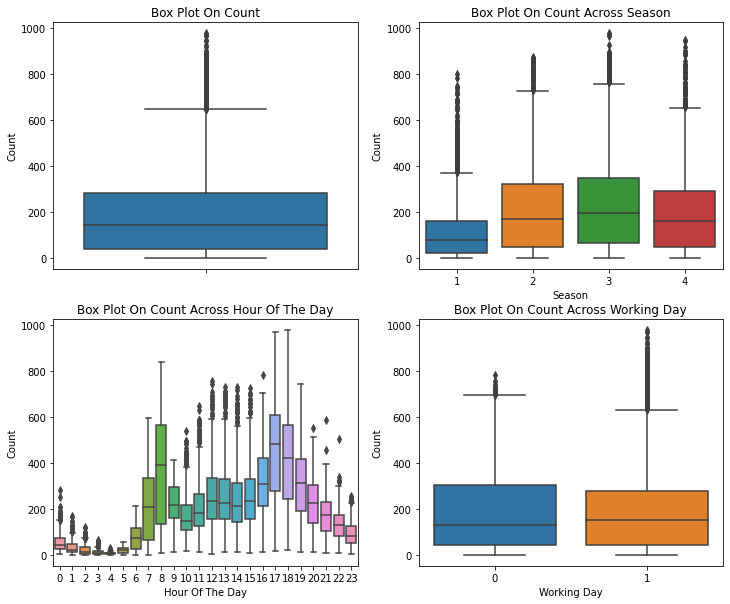

In [17]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2,ncols=2)

fig.set_size_inches(12, 10)
sns.boxplot(data=data,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=data,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")


(4) X, y 컬럼 선택 및 train/test 데이터 분리
X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?

count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기


In [27]:
model_data = data.copy()

model_data.drop('casual',axis=1,inplace=True)
model_data.drop('registered',axis=1,inplace=True)
model_data.drop('datetime',axis=1,inplace=True)

print('model:',model_data.columns)
print('data:',data.columns)

model: Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour',
       'minute', 'second'],
      dtype='object')
data: Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')


In [19]:
bike_label = model_data['count']
model_data.drop('count',axis=1,inplace=True)

# iris_label = iris.target





(5) LinearRegression 모델 학습
sklearn의 LinearRegression 모델 불러오기 및 학습하기

In [20]:
print(model_data)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(model_data, 
                                                    bike_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

       season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  year  month  day  hour  minute  second  
0         0.0000  2011      1    1     0       0       0  
1         0.0000 

In [21]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)
print('coef_',reg.coef_)
print('intercept_',reg.intercept_)


coef_ [-8.12365356 -4.74964843  1.90494264 -3.90069719  1.29474591  5.01988878
 -2.06777479  0.47482895 80.80764651  9.95648406  0.09213542  7.8769009
  0.          0.        ]
intercept_ -162507.04578926082


In [22]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}


(6) 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
학습된 모델에 X_test를 입력해서 예측값 출력하기
모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
mse 값과 함께 rmse 값도 계산하기

In [23]:
ypred=reg.predict(X_test)

In [24]:
import numpy as np
Training_score = reg.score(X_train, y_train)
print("Training score: ", Training_score)

test_score = reg.score(X_test, y_test)
print("test score: ", test_score) 
from sklearn.metrics import mean_squared_error

# mse=mean_squared_error(y_test, ypred)
mse=np.sum((ypred-y_test)**2)/len(y_test)

print('mse:',mse)
rmse=mse**0.5
print('rmse:',rmse)


Training score:  0.389036991497165
test score:  0.38911770872468343
mse: 19585.597692139643
rmse: 139.94855373364757



(7) x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기

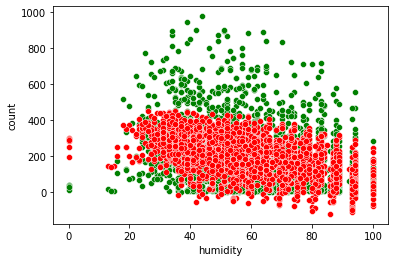

In [33]:
import seaborn as sns
sns.scatterplot(x = X_test['humidity'], y = y_test, color = 'green')
# sns.scatterplot(x = model_data['temp'], y = data['count'], color = 'red');
sns.scatterplot(x = X_test['humidity'], y = ypred, color = 'red');
plt.show()

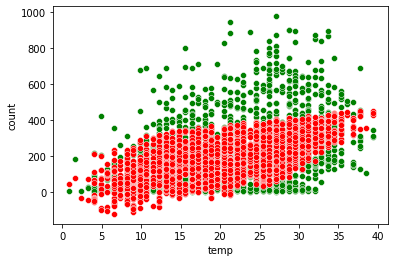

In [34]:
sns.scatterplot(x = X_test['temp'], y = y_test, color = 'green')
# sns.scatterplot(x = model_data['temp'], y = data['count'], color = 'red');
sns.scatterplot(x = X_test['temp'], y = ypred, color = 'red');
plt.show()